# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
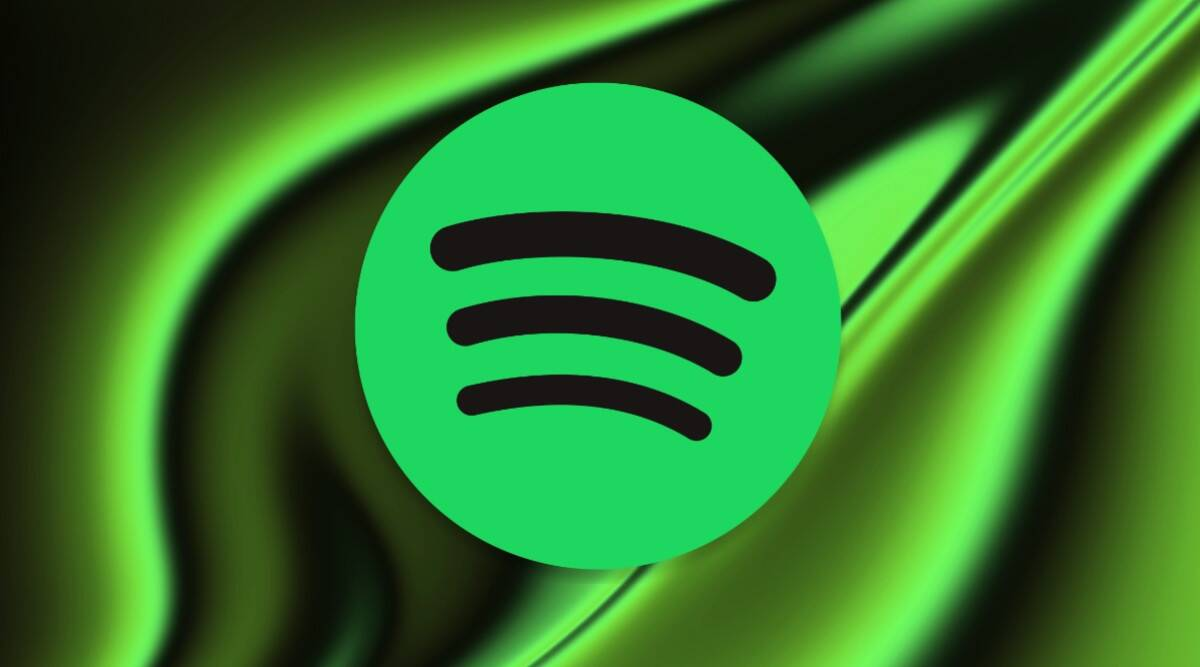
</div>

# Import Libraries

In [672]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from pprint import pprint 
import warnings

In [673]:
%pwd

'c:\\Users\\ASUS\\Music\\9831133_AmirBehnam'

# Load Spotify Dataset (CSV file)

In [674]:
spotify_df = pd.read_csv(r'Spotfiy_Persian_Artists.csv' , names=['track_id' ,'disc_number', 'duration_ms', 'explicit' , 'track_name' , 'track_name_farsi', 'artist_name' , 'artist_name_farsi' , 'popularity' , 'track_number', 'album_href', 'album_id' , 'album_name' , 'album_release_date' , 'album_total_tracks' , 'album_release_year' , 'track_href', 'danceability' , 'energy' , 'key' , 'loudness' , 'mode' , 'speechiness' , 'acousticness' , 'instrumentalness' , 'liveness' , 'valence' , 'tempo' , 'time_signature' , 'key_name' , 'mode_name' , 'key_mode'],skiprows=1)
spotify_df.describe
print(spotify_df)

                     track_id  disc_number  duration_ms  explicit   
0      31iPeC6I0AiRW8InOxNKzm            1       446880     False  \
1      4Fi46ha8teWYTwk0b8fNPi            1       851920     False   
2      0lQAe6EslKA7CUsS7SCW6Q            1       293160     False   
3      6dAFmJdVsKk5ksCpGqnKgO            1       648720     False   
4      4VSDJGyEdSMB8UL4fDSCvv            1       273480     False   
...                       ...          ...          ...       ...   
10627  4pEbf7VQrO4StzbqdFOnr5            1       397505     False   
10628  6umKGf6TO7aRXvJWkP6WSy            1      3522173     False   
10629  5KiMQApCqUVNObTO004MWI            1      3402706     False   
10630  4w1VKm2kjmA2Xz4YSMBfIn            1      3342733     False   
10631  2e4KeWR0Ym9CTBrSG08FSc            1       530920     False   

                             track_name   track_name_farsi     artist_name   
0                          Ghazale Taze                NaN    Salar Aghili  \
1              

# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [675]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [676]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [677]:
artist_counts = spotify_df['artist_name'].value_counts().sort_values(ascending=False)
print(artist_counts)

artist_name
Mohammadreza Shajarian    554
Hossein Alizadeh          545
Reza Sadeghi              507
Dariush                   465
Alireza Eftekhari         439
                         ... 
Nasser Abdollahi           22
Mohammad Golriz            17
Ebrahim Monsefi            16
Farman Fathalian           10
Koveyti Poor                9
Name: count, Length: 69, dtype: int64


## Q: Get the average duration of songs by each of the artists in minutes

In [678]:
spotify_df['duration_minutes'] = spotify_df['duration_ms'] / 60000
average_duration = spotify_df.groupby('artist_name')['duration_minutes'].mean().round(2)
print(average_duration)

artist_name
Abbas Ghaderi            5.07
Abdolhosein Mokhtabad    6.23
Afshin Moghaddam         4.10
Ali Lohrasbi             3.60
Ali Zand Vakili          4.85
                         ... 
Siavash Ghomayshi        4.34
Sirvan Khosravi          4.35
Soheil Nafissi           3.06
Tohi                     3.52
Xaniar Khosravi          3.93
Name: duration_minutes, Length: 69, dtype: float64


## Q: list of artist's unique names

In [679]:
unique_artists = spotify_df['artist_name'].unique()
print(unique_artists)

['Salar Aghili' 'Mohsen Yeganeh' 'Mehdi Yarrahi' 'Mohammadreza Shajarian'
 'Morteza Pashaei' 'Hesameddin Seraj' 'Mohammad Esfahani'
 'Mohsen Chavoshi' 'Reza Sadeghi' 'Abdolhosein Mokhtabad' 'Alireza Assar'
 'Roozbeh Nematollahi' 'Hossein Alizadeh' 'Peyman Yazdanian'
 'Kayhan Kalhor' 'Siavash Ghomayshi' 'Benyamin Bahadori'
 'Alireza Eftekhari' 'Majid Akhshabi' 'Faramarz Aslani' 'Iraj Bastami'
 'Ehsan Khajeh Amiri' 'Alireza Ghorbani' 'Parviz Meshkatian'
 'Mohammad Reza Lotfi' 'Dang Show' 'Nasser Abdollahi' 'Soheil Nafissi'
 'Farhad Mehrad' 'Afshin Moghaddam' 'Koveyti Poor' 'Mohammad Golriz'
 'Abbas Ghaderi' 'Javad Yassari' 'Sattar' 'Mohsen Sharifian'
 'Babak Jahanbakhsh' 'Mazyar Fallahi' 'Mohammad Alizadeh' 'Farzad Farzin'
 'Ali Zand Vakili' 'Amirabbas Golab' 'Hamid Askari' 'Mohsen Namjoo'
 'Hamed Homayoun' 'Kaveh Deylami' 'Hatam Asgari' 'Hamid Hami'
 'Shahram Shabpareh' 'Moein' 'Hassan Shamaizadeh' 'Faramarz Assef'
 'Dariush' 'Amir Tataloo' 'Rastak' 'Macan Band' 'Sasy' 'Tohi'
 'Homayoun

## Q: Plot average duration of tracks by year

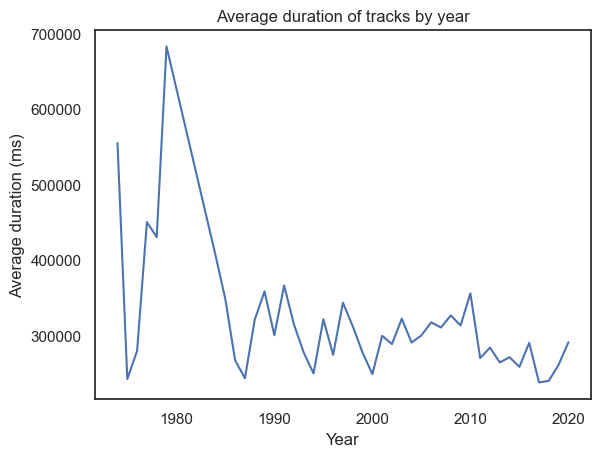

In [680]:

#در اینجا داده هایی که صفر بودن را برای نمودار در نظر نگرفتیم چون باعث می شد نمودار شکلش بد شود

# Create a filtered DataFrame for plotting
plot_df = spotify_df.copy()
plot_df = plot_df[plot_df['album_release_year'] != 0]

# Calculate mean duration by year
mean_duration_by_year = plot_df.groupby('album_release_year')['duration_ms'].mean()

# Plot the results
plt.plot(mean_duration_by_year.index, mean_duration_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average duration (ms)')
plt.title('Average duration of tracks by year')
plt.show()

## Q: Plot average loudness of tracks by year

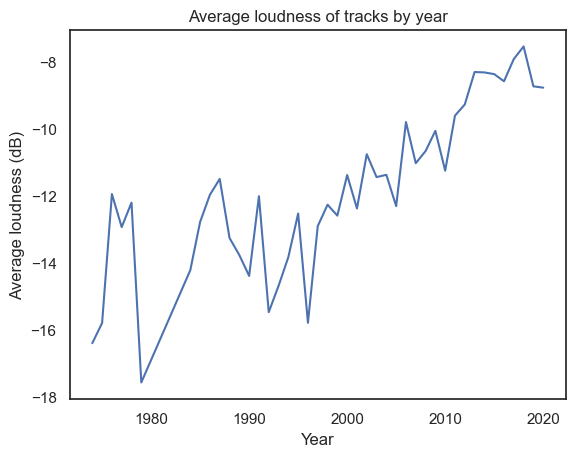

In [681]:
import matplotlib.pyplot as plt

# Create a filtered DataFrame for plotting
plot_df = spotify_df.copy()
plot_df = plot_df[plot_df['album_release_year'] != 0]

# Group by album_release_year and calculate mean of loudness
mean_loudness_by_year = plot_df.groupby('album_release_year')['loudness'].mean()

# Plot the results
plt.plot(mean_loudness_by_year.index, mean_loudness_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average loudness (dB)')
plt.title('Average loudness of tracks by year')
plt.show()

## Q: Music attributes of songs over the years


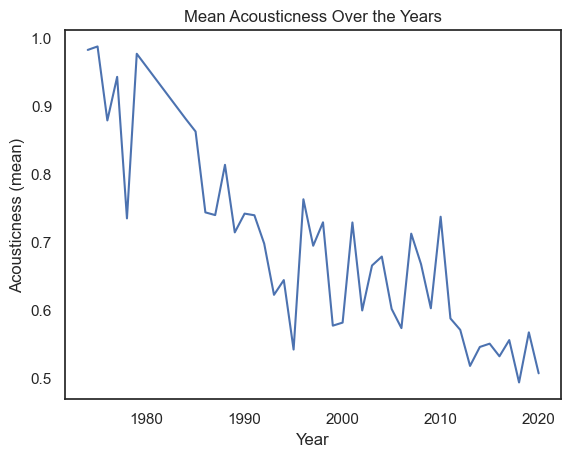

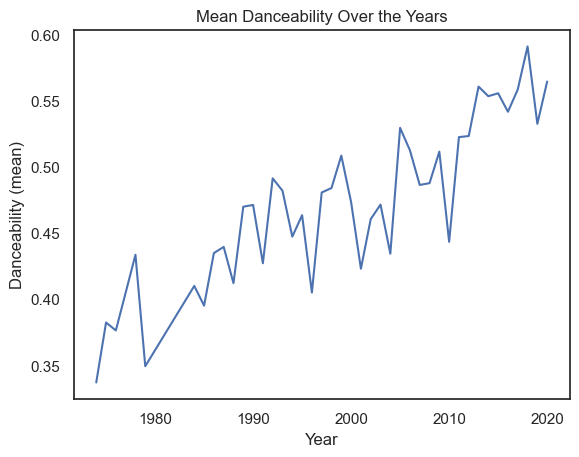

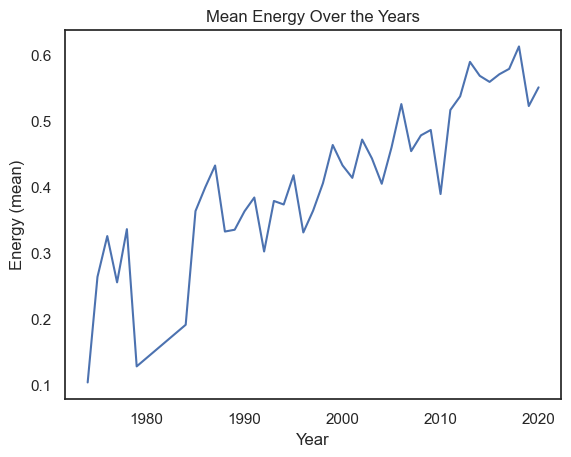

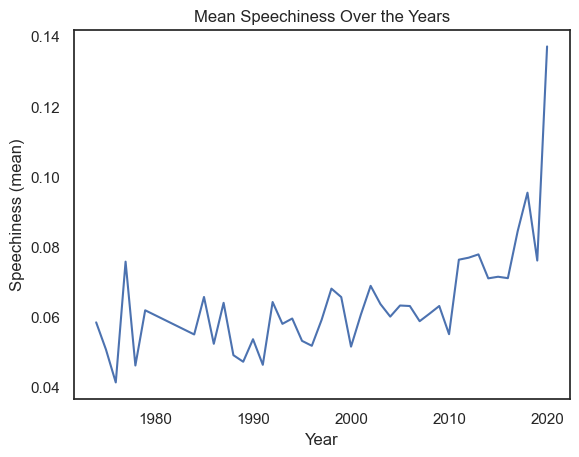

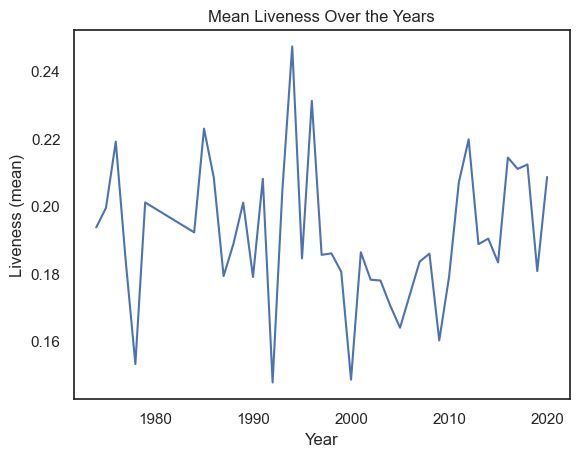

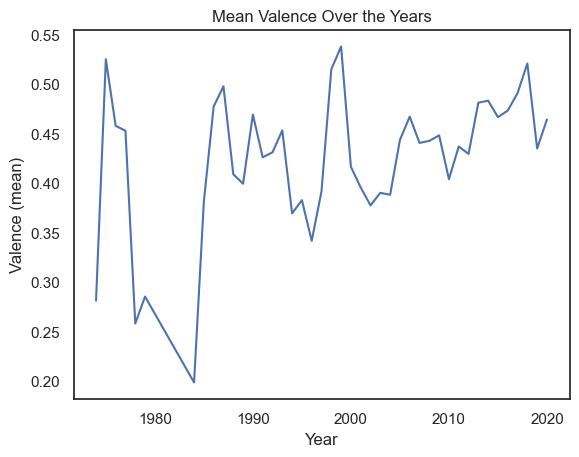

In [682]:
# Create a filtered DataFrame for plotting
plot_df = spotify_df.copy()
plot_df = plot_df[plot_df['album_release_year'] != 0]

# Columns of interest
target_cols = ["acousticness", "danceability", "energy", "speechiness", "liveness", "valence"]

# Group by album_release_year and calculate mean of target columns
grouped = plot_df.groupby("album_release_year")[target_cols].mean()

# Plot each attribute separately
for col in target_cols:
    plt.figure()
    plt.plot(grouped.index, grouped[col])
    plt.xlabel("Year")
    plt.ylabel(col.capitalize() + " (mean)")
    plt.title("Mean " + col.capitalize() + " Over the Years")
    plt.show()

## Q: Plot top 10 popular tracks (Bar Chart)

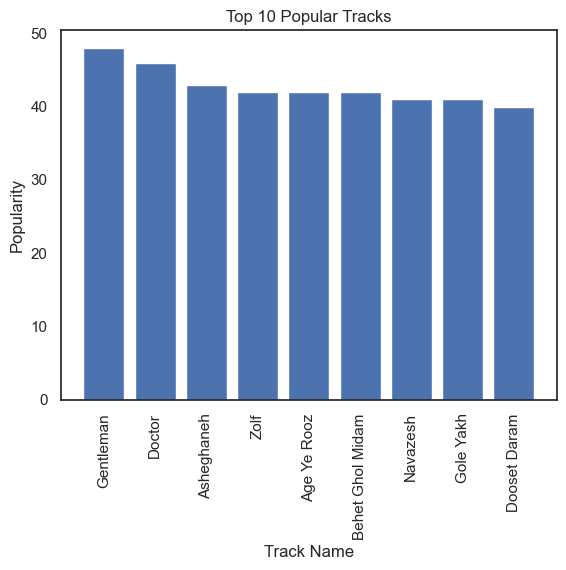

In [683]:
import matplotlib.pyplot as plt

# Sort the dataframe by popularity in descending order and select top 10 rows
top_10_tracks = spotify_df.sort_values('popularity', ascending=False).head(10)

# Create a bar chart of the top 10 tracks
plt.bar(top_10_tracks['track_name'], top_10_tracks['popularity'])
plt.xticks(rotation=90)
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.title('Top 10 Popular Tracks')
plt.show()

## Q: Plot top 10 popular artist (Bar Chart)

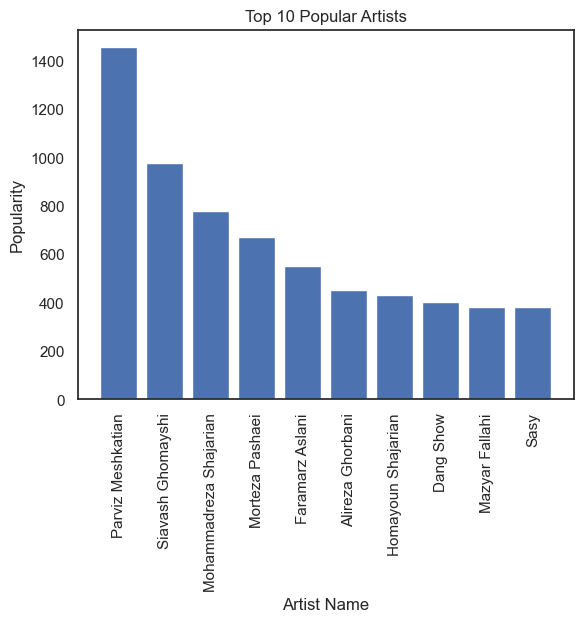

In [684]:
import matplotlib.pyplot as plt

# Group the dataframe by 'artist_name' and aggregate the 'popularity' column by summing up its values per artist
grouped_by_artist = spotify_df.groupby('artist_name')['popularity'].sum().reset_index()

# Sort the resulting dataframe by popularity in descending order and select top 10 rows
top_10_artists = grouped_by_artist.sort_values('popularity', ascending=False).head(10)

# Create a bar chart of the top 10 artists
plt.bar(top_10_artists['artist_name'], top_10_artists['popularity'])
plt.xticks(rotation=90)
plt.xlabel('Artist Name')
plt.ylabel('Popularity')
plt.title('Top 10 Popular Artists')
plt.show()

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

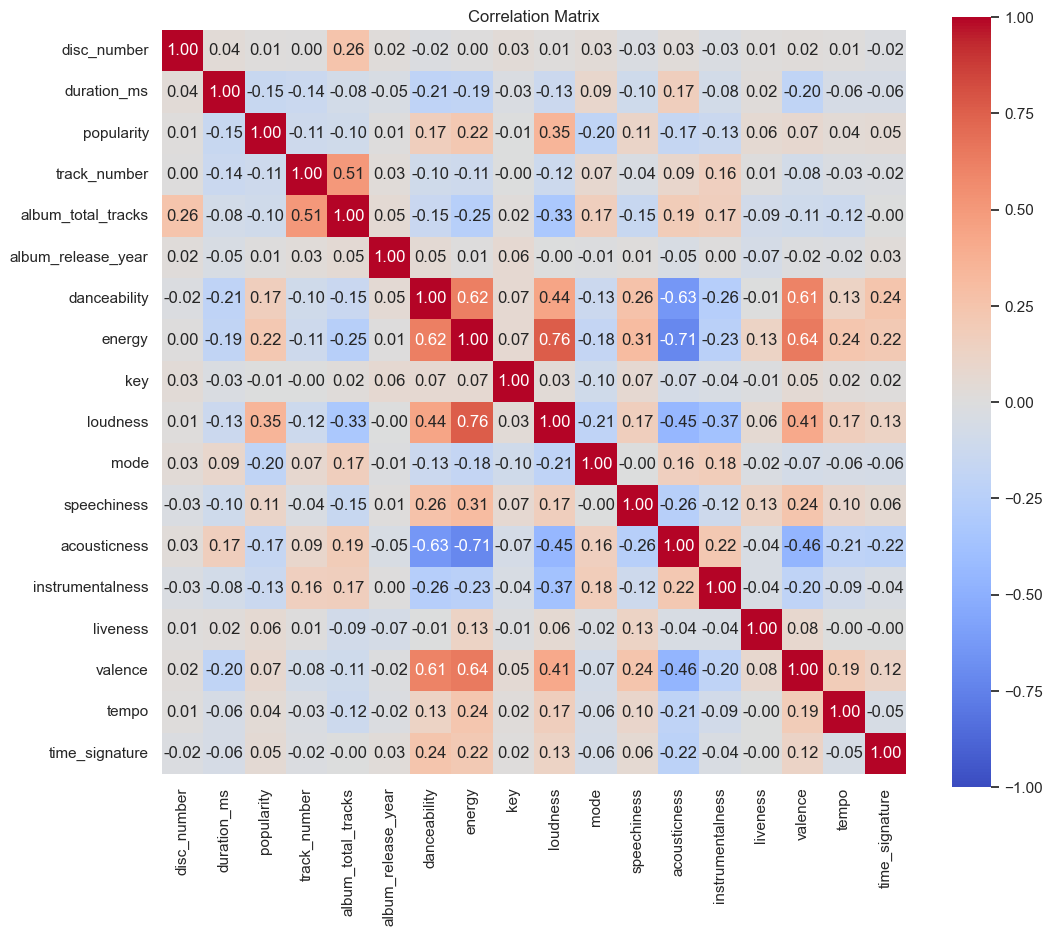


Top 5 correlated features with 'popularity':
loudness        0.345591
energy          0.223515
danceability    0.166421
speechiness     0.114274
valence         0.072353
Name: popularity, dtype: float64


'\nthe line above gives the entine popularity_corr , i placed it in the code in case you want to get all the results when checking\n'

In [685]:
# Select only numeric columns excluding 'duration_minutes'
numeric_cols = spotify_df.select_dtypes(include='number').drop(columns=['duration_minutes'])

# Calculate the correlation matrix including NaN values
corr_matrix = numeric_cols.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix')
plt.show()

# Sort the correlations with 'popularity' in descending order
popularity_corr = corr_matrix['popularity'].sort_values(ascending=False)

# Print the top 5 correlated features with 'popularity'
print("\nTop 5 correlated features with 'popularity':")
print(popularity_corr[1:6])
#print(popularity_corr)
"""
the line above gives the entine popularity_corr , i placed it in the code in case you want to get all the results when checking
"""

Top 5 correlated features with 'duration_ms':
acousticness    0.170713
mode            0.089504
disc_number     0.035092
liveness        0.018118
key            -0.031191
Name: duration_ms, dtype: float64


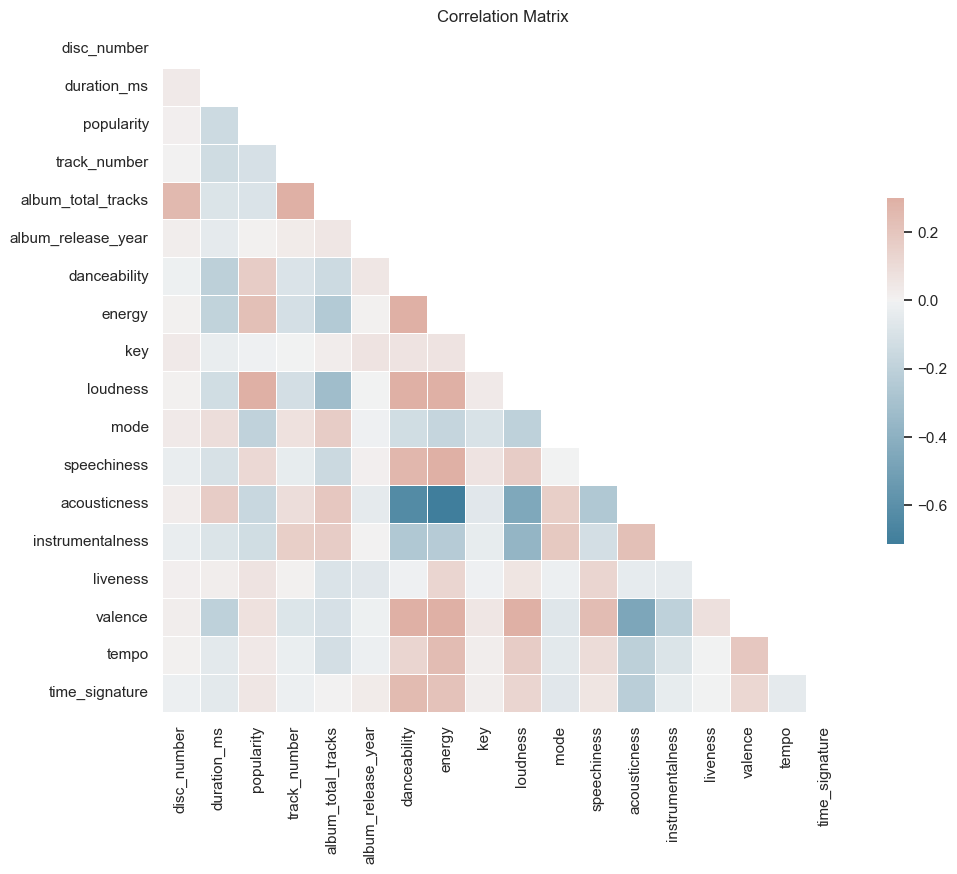

In [686]:
# Select only numeric columns excluding 'duration_minutes'
numeric_cols = spotify_df.select_dtypes(include='number').drop(columns=['duration_minutes'])

# Calculate the correlation matrix including NaN values
corr_matrix = numeric_cols.corr()

# Sort the correlations with 'duration_ms' in descending order
duration_corr = corr_matrix['duration_ms'].sort_values(ascending=False)

# Print the top 5 correlated features with 'duration_ms'
print("Top 5 correlated features with 'duration_ms':")
print(duration_corr[1:6])
#print(duration_corr)
#in case you want to check all the featues run the comment above

# Create a heatmap of the correlation matrix using seaborn
sns.set(style="white")
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

#Both the methods for popularity and duration_ms are almost the same, i used  differnet methods to get more creative resutls

## Q: Plot box-plot for each feature 
Compare box-plot values of `energy` and `liveness`

Statistics for energy:
Minimum: 0.000975
Q1: 0.298
Median: 0.489
Q3: 0.693
Maximum: 0.998

Statistics for liveness:
Minimum: 0.0
Q1: 0.0958
Median: 0.133
Q3: 0.25
Maximum: 0.992



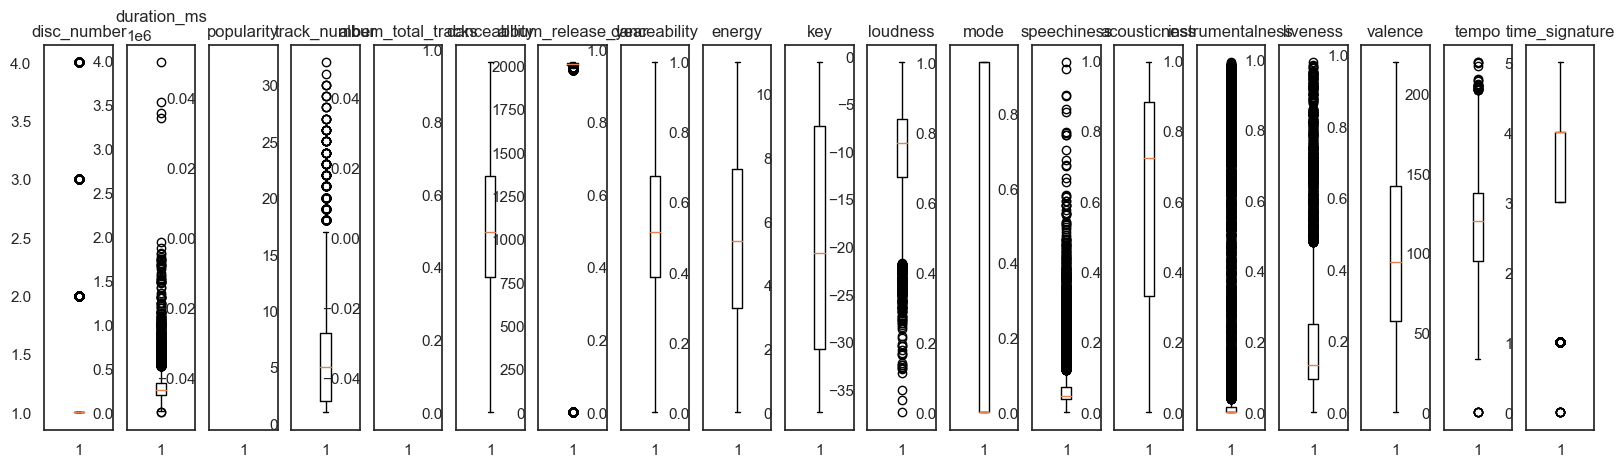

In [687]:
import numpy as np
import matplotlib.pyplot as plt

# Define the columns you want to analyze
columns_to_plot = ['disc_number','duration_ms', 'popularity','track_number','album_total_tracks','danceability','album_release_year','danceability','energy','key','loudness','mode', 'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']

# Calculate the statistics for energy and liveness
statistics = {}
for col in ['energy', 'liveness']:
    data = spotify_df[col]
    statistics[col] = {
        'min': np.min(data),
        'Q1': np.percentile(data, 25),
        'median': np.median(data),
        'Q3': np.percentile(data, 75),
        'max': np.max(data)
    }

# Plot box plots for each column
fig, axs = plt.subplots(ncols=len(columns_to_plot), figsize=(20,5))
for i, col in enumerate(columns_to_plot):
    axs[i].boxplot(spotify_df[col])
    axs[i].set_title(col)

# Print the statistics for energy and liveness
for col in ['energy', 'liveness']:
    stats = statistics[col]
    print(f"Statistics for {col}:")
    print(f"Minimum: {stats['min']}")
    print(f"Q1: {stats['Q1']}")
    print(f"Median: {stats['median']}")
    print(f"Q3: {stats['Q3']}")
    print(f"Maximum: {stats['max']}")
    print()

plt.show()

## Q: Missing values 
How many `nan` values are there in each column?

In [688]:
spotify_df.isnull().sum()

track_id                  0
disc_number               0
duration_ms               0
explicit                  0
track_name                0
track_name_farsi      10020
artist_name               0
artist_name_farsi         0
popularity             9701
track_number              0
album_href             9701
album_id                  0
album_name                0
album_release_date        0
album_total_tracks     9701
album_release_year        0
track_href                0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
key_name                144
mode_name               144
key_mode                144
duration_minutes          0
dtype: int64

# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [689]:
categorical_cols = ['key_name','mode_name', 'key_mode','album_href','track_name_farsi']
for col in categorical_cols:
    spotify_df[col].fillna('None', inplace=True)
spotify_df.isnull().sum()

track_id                 0
disc_number              0
duration_ms              0
explicit                 0
track_name               0
track_name_farsi         0
artist_name              0
artist_name_farsi        0
popularity            9701
track_number             0
album_href               0
album_id                 0
album_name               0
album_release_date       0
album_total_tracks    9701
album_release_year       0
track_href               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
key_name                 0
mode_name                0
key_mode                 0
duration_minutes         0
dtype: int64

In [690]:
# I choose median because since there are outliers and for that its the best and most reasonable apporach 

numerical_features = ['popularity', 'album_total_tracks']

# Calculate the median for each column
median_values = spotify_df[numerical_features].median()

# Fill NaN values with the median
spotify_df[numerical_features] = spotify_df[numerical_features].fillna(median_values)

# Print the updated DataFrame
print(spotify_df.isnull().sum())

track_id              0
disc_number           0
duration_ms           0
explicit              0
track_name            0
track_name_farsi      0
artist_name           0
artist_name_farsi     0
popularity            0
track_number          0
album_href            0
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_release_year    0
track_href            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
key_name              0
mode_name             0
key_mode              0
duration_minutes      0
dtype: int64


 median ra entekhab kardam  be dalil inken outlier darim va in behtarin parameter baray zamani ke outlier darim hast va hazf kare dorosti nist

# Determine your desired features here

In [691]:
music_feature_cols = [  'popularity',  'track_name'  ,  'album_name' , 'album_total_tracks' ,'danceability' , 'energy' , 'key' , 'loudness' , 'mode' , 'speechiness' , 'acousticness' , 'instrumentalness' , 'liveness' , 'valence' , 'tempo'  ]

In [692]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the artist names and transform them to numerical labels
spotify_df['artist_name'] = le.fit_transform(spotify_df['artist_name'])
spotify_df['track_id'] = le.fit_transform(spotify_df['track_id'])
spotify_df['explicit'] = le.fit_transform(spotify_df['explicit'])
spotify_df['track_name'] = le.fit_transform(spotify_df['track_name'])
spotify_df['track_name_farsi'] = le.fit_transform(spotify_df['track_name_farsi'])
spotify_df['album_href'] = le.fit_transform(spotify_df['album_href'])
spotify_df['album_id'] = le.fit_transform(spotify_df['album_id'])
spotify_df['album_name'] = le.fit_transform(spotify_df['album_name'])
spotify_df['track_href'] = le.fit_transform(spotify_df['track_href'])
spotify_df['key_name'] = le.fit_transform(spotify_df['key_name'])
spotify_df['mode_name'] = le.fit_transform(spotify_df['mode_name'])
spotify_df['key_mode'] = le.fit_transform(spotify_df['key_mode'])
spotify_df['artist_name_farsi'] = le.fit_transform(spotify_df['artist_name_farsi'])
spotify_df['album_release_date'] = le.fit_transform(spotify_df['album_release_date'])
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name']].dropna()
tracks_feature_df.head()

,popularity,track_name,album_name,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name
0,20.0,2722,1968,10.0,0.437,0.390,0,-7.170,0,0.0299,0.839,0.000035,0.1360,0.330,131.913,58
1,20.0,600,1968,10.0,0.379,0.146,5,-10.008,1,0.0414,0.970,0.000360,0.0812,0.346,105.634,58
2,20.0,6515,1968,10.0,0.437,0.453,5,-5.392,0,0.0349,0.664,0.002070,0.1100,0.501,94.651,58
3,20.0,4493,1968,10.0,0.488,0.138,2,-12.287,0,0.0451,0.915,0.006580,0.2120,0.445,110.967,58
4,20.0,1201,1968,10.0,0.301,0.443,0,-5.702,0,0.0334,0.657,0.000008,0.1200,0.410,148.053,58


## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models. 

In [693]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical features in the dataframe
scaled_data = scaler.fit_transform(tracks_feature_df[music_feature_cols])

# Assign the scaled data back to the original dataframe
tracks_feature_df[music_feature_cols] = scaled_data
tracks_feature_df.head()

,popularity,track_name,album_name,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name
0,-0.003236,-0.459141,1.458826,0.012815,-0.428643,-0.440144,-1.432162,0.629863,-0.772888,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,58
1,-0.003236,-1.438468,1.458826,0.012815,-0.765201,-1.449424,-0.056665,0.013646,1.293849,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,58
2,-0.003236,1.291373,1.458826,0.012815,-0.428643,-0.179551,-0.056665,1.015921,-0.772888,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,58
3,-0.003236,0.358196,1.458826,0.012815,-0.132704,-1.482515,-0.881964,-0.481195,-0.772888,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,58
4,-0.003236,-1.161100,1.458826,0.012815,-1.217813,-0.220915,-1.432162,0.948610,-0.772888,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,58


## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


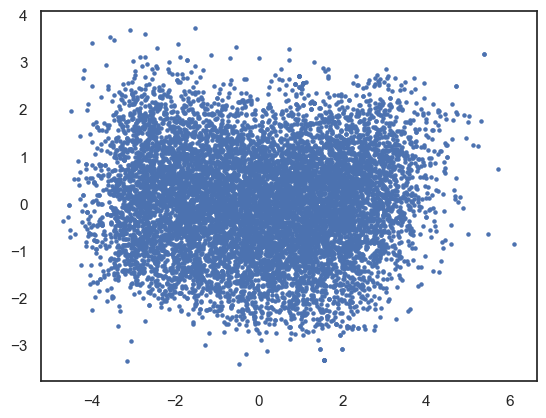

In [694]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)


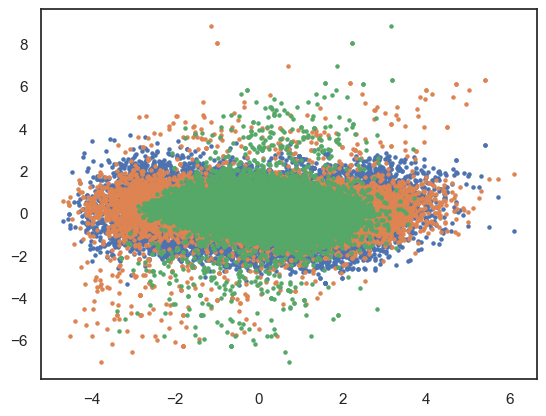

In [695]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [696]:
# Set random seed to make results reproducible 
RANDOM_SEED = 42

In [697]:
#dar mord inke chera in 4 ta feature ro entekhab kardam chand ta nokte hast avalan ke dade ha ya soton haye ke bi rabt hastan ro dar nazar nemigirim mesl 
df = spotify_df
regression_features = [
    'energy', 'danceability', 'speechiness', 'loudness'
]
x=df.loc[:, ['energy', 'danceability', 'speechiness', 'loudness']].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

#dar mord inke chera in 4 ta feature ro entekhab kardam chand ta nokte hast avalan ke dade ha ya soton haye ke bi rabt hastan ro dar nazar nemigirim mesl album_href chon amal komaki be ma nemikonan va maslan in data khelli bi rabt bod nokte dovom in outlier ha bodan va soton haye outlier dashtan dar nazar gerefte nemishodan behtar bod chon baes afzayesh khata mishe. nokte sevom yek seri feature ha mesl track_id amalan etelaat mofidi be ma nemidadan va amalan mesl shomare har sath bodan ke baray in gesmat mofid nabod. feature haye dige ham bodan ke beshe entekhab kard vali in 4 ta behtarin amalkard ra dashtan

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [698]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

20.92075999694433
[-0.79310123  0.50832471  1.27877993  0.08665998]


## Evaluate Regression Algorithm

In [699]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output.head()

,Actual,Predicted
0,13.0,20.092214
1,20.0,20.462054
2,20.0,20.350603
3,20.0,19.948453
4,20.0,20.026579


In [700]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9518480317800839
Mean Squared Error: 8.830278993199308
Root Mean Squared Error: 2.9715785355933817


# Classification

## Prepare Labels

In [701]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column 
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [702]:
label_mapping = {
    58: 'Salar Aghili',
    46: 'Mohammadreza Shajarian',
    42: 'Hesameddin Seraj',
    1: 'Mohammad Esfahani',
    29: 'Abdolhosein Mokhtabad',
    33: 'Hossein Alizadeh',
    6: 'Kayhan Kalhor',
    6: 'Alireza Eftekhari',
    30: 'Iraj Bastami',
    7: 'Alireza Ghorbani',
    53: 'Parviz Meshkatian',
    45: 'Mohammad Reza Lotfi',
    4: 'Ali Zand Vakili',
    32: 'Kaveh Deylami',
    25: 'Hatam Asgari',
    28: 'Homayoun Shajarian',
    61: 'Shahram Nazeri'
}

# Create a new column called 'is_sonnati' and initialize with zeros
spotify_df['is_sonnati'] = 0

# Iterate over each row in the dataframe
for index, row in spotify_df.iterrows():
    # Get the label encoded value from 'artist_name'
    label_encoded_value = row['artist_name']
    
    # Convert the label encoded value to the corresponding artist name
    artist_name = label_mapping.get(label_encoded_value)
    
    if artist_name in sonnati_artists:
        # If the artist name is in 'sonnati_artists', set 'is_sonnati' to 1
        spotify_df.at[index, 'is_sonnati'] = 1

print(spotify_df['is_sonnati'])
#spotify_df['is_sonnati'].describe()

0        1
1        1
2        1
3        1
4        1
        ..
10627    1
10628    1
10629    1
10630    1
10631    1
Name: is_sonnati, Length: 10632, dtype: int64


In [703]:
tracks_feature_df.describe()

,popularity,track_name,album_name,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name
count,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,10632.000000
mean,-2.138579e-16,2.138579e-17,1.015825e-16,-4.130130e-16,-2.994010e-16,-5.881091e-17,2.004917e-17,-2.486098e-16,-8.019670e-18,-8.019670e-18,-3.983103e-16,7.485025e-17,-7.485025e-17,-1.924721e-16,3.421726e-16,35.013826
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,20.103717
min,-6.495213e+00,-1.715375e+00,-1.688832e+00,-4.495300e+00,-2.964434e+00,-2.049304e+00,-1.432162e+00,-5.934864e+00,-7.728879e-01,-9.826719e-01,-1.918195e+00,-4.481700e-01,-1.248615e+00,-1.884641e+00,-4.002013e+00,0.000000
25%,-3.236219e-03,-8.515410e-01,-8.891221e-01,1.281464e-02,-8.058199e-01,-8.206920e-01,-8.819636e-01,-5.634327e-01,-7.728879e-01,-4.747521e-01,-8.735159e-01,-4.481700e-01,-6.295786e-01,-8.106294e-01,-8.134842e-01,15.000000
50%,-3.236219e-03,-7.090055e-03,7.532798e-02,1.281464e-02,-8.047930e-02,-3.064107e-02,-5.666550e-02,2.179660e-01,-7.728879e-01,-3.509379e-01,3.631892e-01,-4.478620e-01,-3.892012e-01,-1.235549e-01,2.329099e-02,38.000000
75%,-3.236219e-03,8.507447e-01,9.038274e-01,1.281464e-02,8.189431e-01,8.131829e-01,1.043732e+00,7.497731e-01,1.293849e+00,-3.682961e-02,8.572419e-01,-3.957539e-01,3.668246e-01,7.632628e-01,6.252294e-01,53.000000
max,9.085531e+00,1.785190e+00,1.663552e+00,2.255339e+01,2.629393e+00,2.074783e+00,1.593931e+00,2.050765e+00,1.293849e+00,1.222887e+01,1.215981e+00,3.052098e+00,5.161450e+00,2.214799e+00,3.371699e+00,68.000000


## Create Classification Dataset

In [704]:
# Create a StandardScaler object
scaler = StandardScaler()

# Perform standardization on all columns in tracks_feature_df
columns_to_standardize = [col for col in tracks_feature_df.columns if col != 'is_sonnati']

tracks_feature_df[columns_to_standardize] = scaler.fit_transform(tracks_feature_df[columns_to_standardize])

# Add is_sonnati column to tracks_feature_df
tracks_feature_df['is_sonnati'] = spotify_df['is_sonnati']

# Copy is_sonnati column from tracks_feature_df to spotify_df
spotify_df['is_sonnati'] = tracks_feature_df['is_sonnati']



# Create classification dataset using either tracks_feature_df or spotify_df
# dar inja hamantor ke gofte shod 'popularity'va 'artist_name'are dar nazar nemigirim va jozve feature ha baray in gesmat nistan
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati', 'popularity', 'artist_name']).values
y = tracks_feature_df['is_sonnati'].values

columns_for_x = list(tracks_feature_df.drop(columns=['is_sonnati', 'popularity', 'artist_name']).columns)
print(columns_for_x)
#khorji baray x niz bedon in 3 feature ha moshahede mishavad

['track_name', 'album_name', 'album_total_tracks', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


In [705]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 15)
y.shape=(10632,)


In [706]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`) 


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [707]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset
    
    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)
    
    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=42, shuffle=True
    )
    
    # Scale features
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Train model
    classifier = model
    classifier.fit(x_train_scaled, y_train)
    
    # Make predictions
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)
        y_pred = classifier.predict(x_test_scaled)
    
    # Evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred, zero_division=0, average='weighted')
    eval_metrics['recall'] = recall_score(y_test, y_pred, zero_division=0, average='weighted')
    eval_metrics['f1'] = f1_score(y_test, y_pred, zero_division=0, average='weighted')
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    
    return eval_metrics

In [708]:
# Assuming you have defined x and y
dataset = (x, y)

# Create an instance of AdaBoostClassifier
adaboost_model = AdaBoostClassifier()

# Call the fit_and_eval function with adaboost_model and dataset
pprint(fit_and_eval(adaboost_model, dataset))

{'acc': 0.945141065830721,
 'confusion': array([[2021,   99],
       [  76,  994]], dtype=int64),
 'f1': 0.9452831303168616,
 'precision': 0.9455328167151669,
 'recall': 0.945141065830721}


In [709]:
#autograde
from sklearn.ensemble import RandomForestClassifier
dataset = (x, y)
pprint(fit_and_eval(RandomForestClassifier(), dataset))


{'acc': 0.941692789968652,
 'confusion': array([[2034,   86],
       [ 100,  970]], dtype=int64),
 'f1': 0.9415967546063694,
 'precision': 0.9415410324359845,
 'recall': 0.941692789968652}


مدل : جنگل تصادفی

راندام فرست عمل کردی بهتری داشت به دلایل زیر:


راندم فارست برای طیف گسترده ای از مشکلات طبقه بندی مناسب است.
در مدیریت داده های با ابعاد بالا و تعاملات ویژگی های پیچیده به خوبی عمل می کند.
راندم فراست به دلیل ماهیت مجموعه ای خود در برابر بیش از حد برازش مقاوم است.
اهمیت ویژگی: راندم فراست معیاری از اهمیت ویژگی را ارائه می دهد، که نشان می دهد کدام ویژگی بیشترین کمک را به قدرت پیش بینی مدل دارد. این اطلاعات می تواند در انتخاب ویژگی های مرتبط و بهبود امتیاز اف 1 با تمرکز بر آموزنده ترین ویژگی ها مفید باشد.

گروه یادگیرندگان ضعیف: جنگل تصادفی چندین درخت تصمیم را که یادگیرندگان ضعیفی در نظر گرفته می شوند، ترکیب می کند تا پیش بینی کند. این رویکرد مجموعه به کاهش تعصب و واریانس کمک می‌کند و منجر به بهبود دقت و امتیاز اف 1 در مقایسه با درخت‌های تصمیم فردی می‌شود.


داده های پر سر و صدا: جنگل تصادفی در برابر نویز و داده های پرت مقاوم است. با جمع‌آوری پیش‌بینی‌ها از درخت‌های تصمیم چندگانه، تأثیر نمونه‌های نویز فردی را کاهش می‌دهد و در نتیجه دقت و امتیاز اف 1 را در مقایسه با الگوریتم‌های حساس به موارد پرت، مانند کی ان ان بهبود می‌بخشد.